In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')
data.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
27748,DEBIT,6,4,83.139999,197.949997,Late delivery,1,29,Shop By Sport,New Orleans,...,NaN,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0.0,02-05-2017 10:50,Standard Class
27749,DEBIT,3,4,32.270000,197.949997,Advance shipping,0,29,Shop By Sport,Martinsburg,...,NaN,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0.0,4/22/2017 21:25,Standard Class
27750,DEBIT,5,4,118.800003,247.500000,Late delivery,1,24,Women's Apparel,Elmhurst,...,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0.0,02-04-2017 15:45,Standard Class
27751,DEBIT,3,4,80.440002,247.500000,Advance shipping,0,24,Women's Apparel,Columbia,...,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0.0,04-01-2015 19:40,Standard Class
27752,DEBIT,5,4,30.940001,247.500000,Late delivery,1,24,Women's Apparel,Federal Way,...,NaN,502,24,NaN,http://images.acmesports.sports/Nike+,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(27753, 53)

There are total of 53 columns in the datset but we need to cut it down to 10 or close to 10 features

Days for shipping(real),(scheduled),shipping mode,order status,order region,order state,order item quantity,order item discount rate,order item profit ratio,product category,product weight,shipping date

In [5]:
required_columns = [
        'Days for shipping (real)',
        'Days for shipment (scheduled)',
        'Shipping Mode',
        'Order Status',
        'Order Region',
        'Delivery Status',
        'Order State',
        'Order Item Quantity',
        'Order Item Discount Rate',
        'Order Item Profit Ratio',
        'Product Price',
        'Category Name',
        'shipping date (DateOrders)',
        'Late_delivery_risk'
]

In [6]:
new_data = data[required_columns]

In [13]:
pd.crosstab(new_data['Late_delivery_risk'],new_data['Product Price'])

Product Price,11.290000,15.990000,17.990000,19.990000,21.990000,22.000000,24.990000,25.000000,27.990000,29.990000,...,357.100006,399.980011,399.989990,452.040008,461.480011,532.580017,599.989990,999.989990,1500.000000,1999.989990
Late_delivery_risk,,,,,,,,,,,,,,,,,,,,,
0,18,68,12,66,27,153,208,136,29,24,...,38,450,8,40,30,48,2,1,42,1
1,25,75,27,65,41,155,270,193,31,32,...,60,700,2,91,65,47,2,1,53,1


In [25]:
new_data.describe()

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Late_delivery_risk,ProductPrice_log
count,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000
mean,3.461516,2.941049,2.451175,0.102386,0.122768,121.253159,0.570265,4.441885
std,1.577116,1.372755,1.557284,0.070779,0.464367,136.527571,0.495047,0.796014
min,0.000000,0.000000,1.000000,0.000000,-2.750000,11.290000,0.000000,2.508786
25%,2.000000,2.000000,1.000000,0.040000,0.080000,50.000000,0.000000,3.931826
50%,3.000000,4.000000,2.000000,0.100000,0.270000,59.990002,1.000000,4.110710
75%,5.000000,4.000000,4.000000,0.160000,0.360000,129.990005,1.000000,4.875121
max,6.000000,4.000000,5.000000,0.250000,0.500000,1999.989990,1.000000,7.601397


THE MEDIAN VALUE OF THE PRODUCT PRICE DIFFER A LOT FROM MEAN WHICH MEAN THERE CAN BE OUTLIER

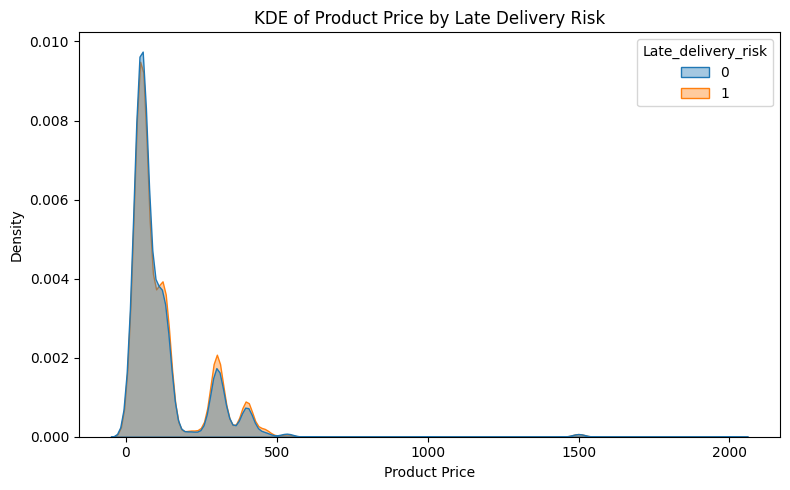

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=new_data,
    x="Product Price",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [23]:
new_data = new_data.copy()
new_data["ProductPrice_log"] = np.log1p(new_data["Product Price"])


IT IS HIGHLY RIGHT SKEWED WHICH MEANS WE NEED TO DO TRANSFPRMATION ON THIS

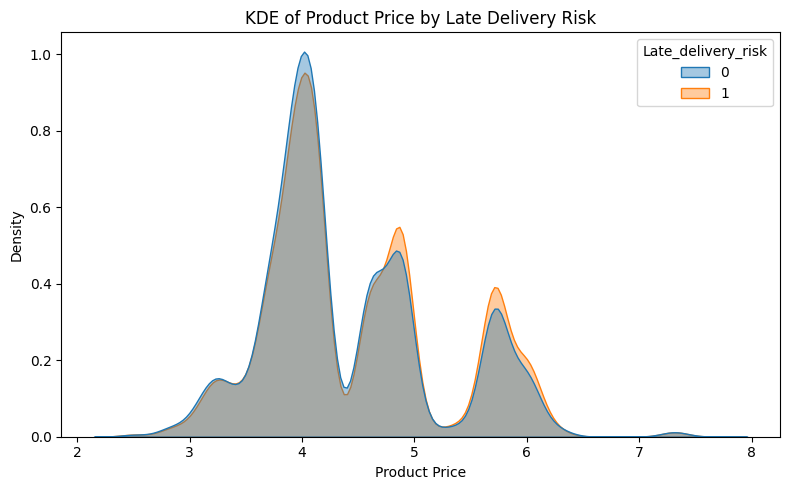

In [26]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=new_data,
    x="ProductPrice_log",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [24]:
new_data.head()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk,ProductPrice_log
0,3,4,Standard Class,COMPLETE,Southeast Asia,Advance shipping,Java Occidental,1,0.04,0.29,327.75,Sporting Goods,02-03-2018 22:56,0,5.795298
1,5,4,Standard Class,PENDING,South Asia,Late delivery,Rajastán,1,0.05,-0.80,327.75,Sporting Goods,1/18/2018 12:27,1,5.795298
2,4,4,Standard Class,CLOSED,South Asia,Shipping on time,Rajastán,1,0.06,-0.80,327.75,Sporting Goods,1/17/2018 12:06,0,5.795298
3,3,4,Standard Class,COMPLETE,Oceania,Advance shipping,Queensland,1,0.07,0.08,327.75,Sporting Goods,1/16/2018 11:45,0,5.795298
4,2,4,Standard Class,PENDING_PAYMENT,Oceania,Advance shipping,Queensland,1,0.09,0.45,327.75,Sporting Goods,1/15/2018 11:24,0,5.795298


In [27]:
new_data.isnull().sum()

,0
Days for shipping (real),0
Days for shipment (scheduled),0
Shipping Mode,0
Order Status,0
Order Region,0
Delivery Status,0
Order State,0
Order Item Quantity,0
Order Item Discount Rate,0
Order Item Profit Ratio,0


In [18]:
new_data.dropna(inplace = True)

In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27752 entries, 0 to 27751
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Days for shipping (real)       27752 non-null  int64  
 1   Days for shipment (scheduled)  27752 non-null  int64  
 2   Shipping Mode                  27752 non-null  object 
 3   Order Status                   27752 non-null  object 
 4   Order Region                   27752 non-null  object 
 5   Delivery Status                27752 non-null  object 
 6   Order State                    27752 non-null  object 
 7   Order Item Quantity            27752 non-null  int64  
 8   Order Item Discount Rate       27752 non-null  float64
 9   Order Item Profit Ratio        27752 non-null  float64
 10  Product Price                  27752 non-null  float64
 11  Category Name                  27752 non-null  object 
 12  shipping date (DateOrders)     27752 non-null  obje

IT DOESN'T CONTAIN ANY MISSING VALUES

In [21]:
late_count = new_data[new_data['Late_delivery_risk'] == 1].shape[0]
ontime_count = new_data[new_data['Late_delivery_risk'] == 0].shape[0]
print(late_count)
print(ontime_count)

15826
11926


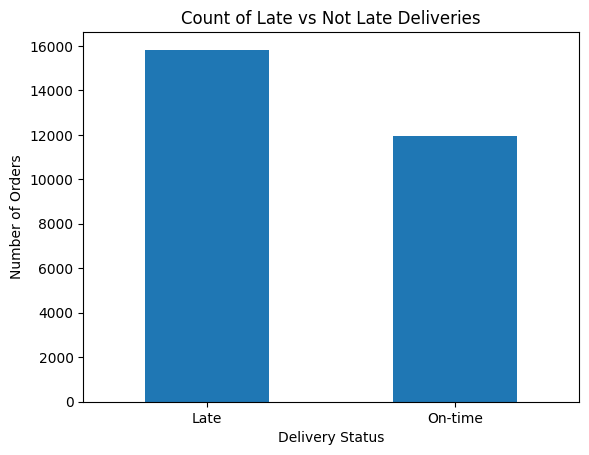

In [22]:
delivery_counts = pd.Series({
    'Late': late_count,
    'On-time': ontime_count
})
delivery_counts.plot(kind='bar')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.title('Count of Late vs Not Late Deliveries')
plt.xticks(rotation=0)
plt.show()

In [37]:
numeric_col = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Order Item Quantity',
    'Order Item Discount Rate',
    'Order Item Profit Ratio',
    'Product Price'
]

In [29]:
pd.crosstab(new_data['Late_delivery_risk'],new_data['Order Item Discount Rate'])

Order Item Discount Rate,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.10,0.12,0.13,0.15,0.16,0.17,0.18,0.20,0.25
Late_delivery_risk,,,,,,,,,,,,,,,,,,
0,661,669,601,654,653,655,656,659,649,660,669,646,696,665,671,711,673,678
1,894,879,881,858,875,908,880,867,895,871,814,911,865,864,876,862,905,921


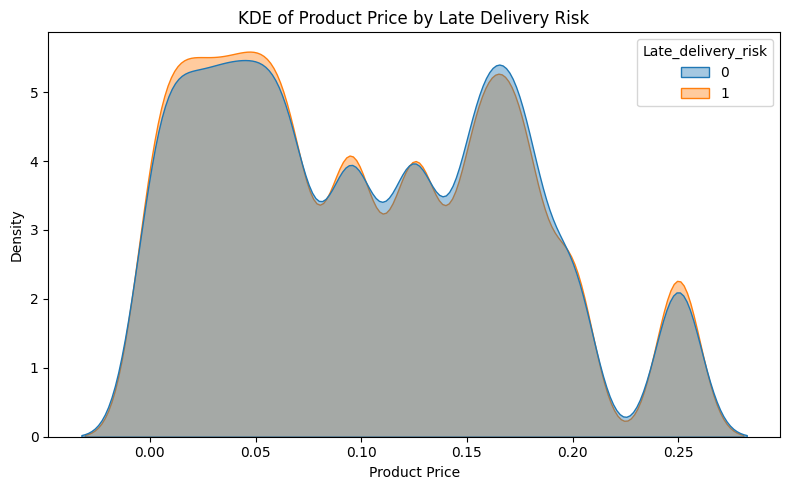

In [31]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=new_data,
    x="Order Item Discount Rate",
    hue="Late_delivery_risk",
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=1
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

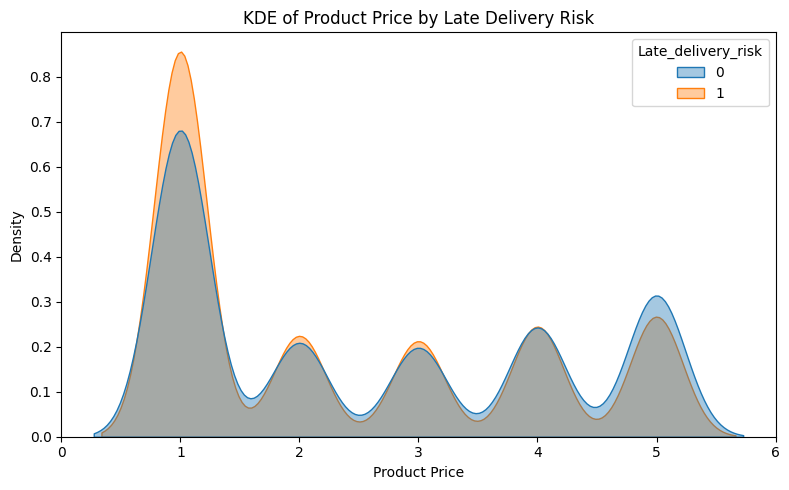

In [32]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=new_data,
    x="Order Item Quantity",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [33]:
new_data['Order_Item_quantity_log'] = np.log1p(new_data['Order Item Quantity'])

In [34]:
new_data.head()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk,ProductPrice_log,Order_Item_quantity_log
0,3,4,Standard Class,COMPLETE,Southeast Asia,Advance shipping,Java Occidental,1,0.04,0.29,327.75,Sporting Goods,02-03-2018 22:56,0,5.795298,0.693147
1,5,4,Standard Class,PENDING,South Asia,Late delivery,Rajastán,1,0.05,-0.80,327.75,Sporting Goods,1/18/2018 12:27,1,5.795298,0.693147
2,4,4,Standard Class,CLOSED,South Asia,Shipping on time,Rajastán,1,0.06,-0.80,327.75,Sporting Goods,1/17/2018 12:06,0,5.795298,0.693147
3,3,4,Standard Class,COMPLETE,Oceania,Advance shipping,Queensland,1,0.07,0.08,327.75,Sporting Goods,1/16/2018 11:45,0,5.795298,0.693147
4,2,4,Standard Class,PENDING_PAYMENT,Oceania,Advance shipping,Queensland,1,0.09,0.45,327.75,Sporting Goods,1/15/2018 11:24,0,5.795298,0.693147


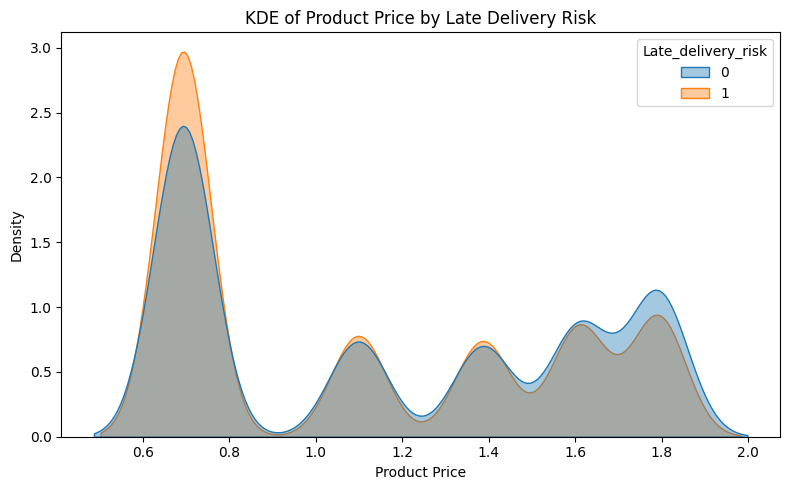

In [35]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=new_data,
    x="Order_Item_quantity_log",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

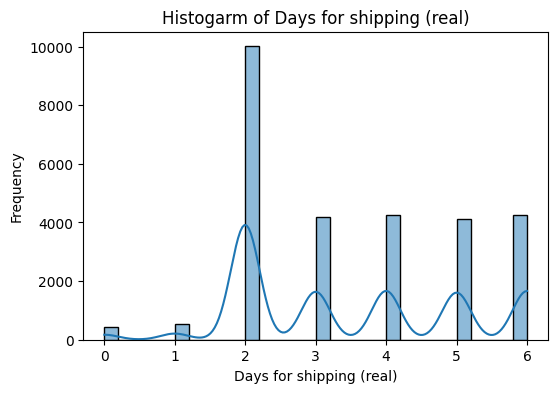

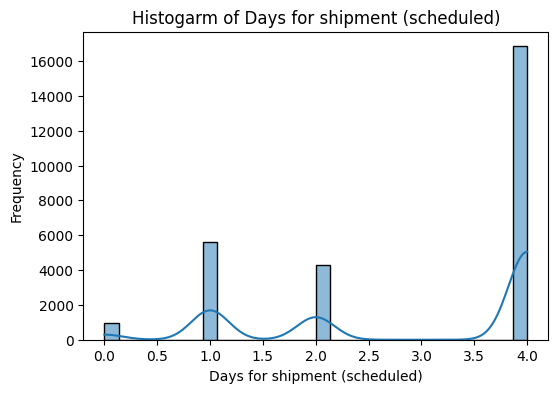

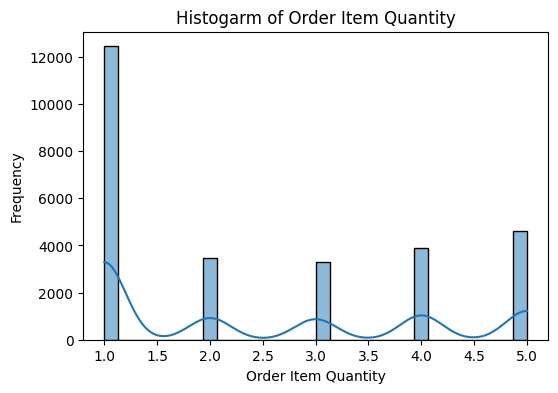

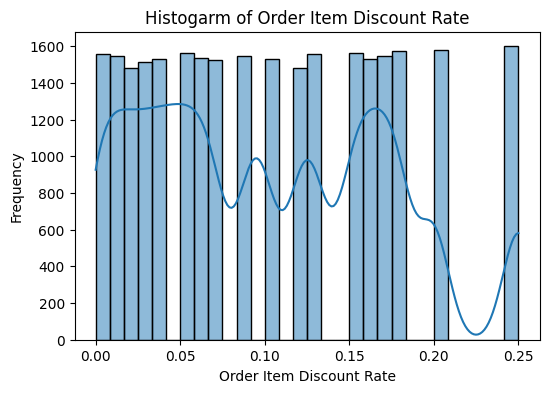

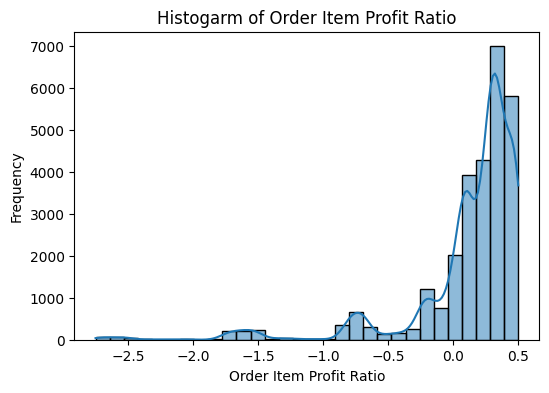

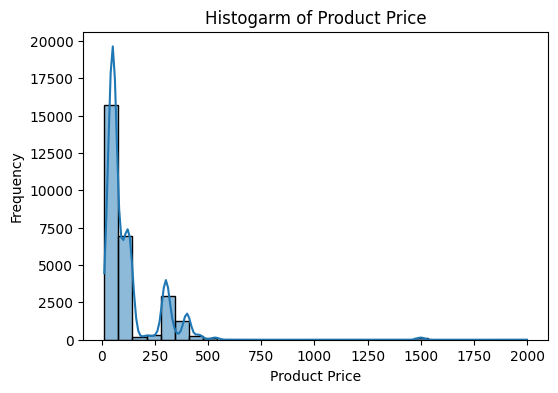

In [38]:
for col in numeric_col:
  plt.figure(figsize = (6,4))
  sns.histplot(new_data[col],bins = 30,kde = True)
  plt.title(f'Histogarm of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

TAKE A LOOK AT IT CAREFULLY

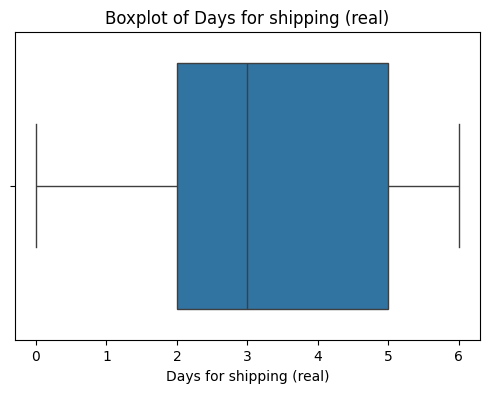

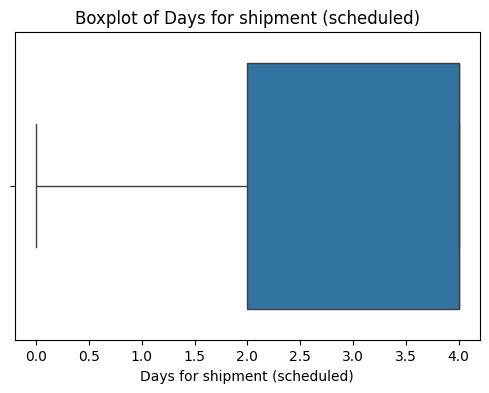

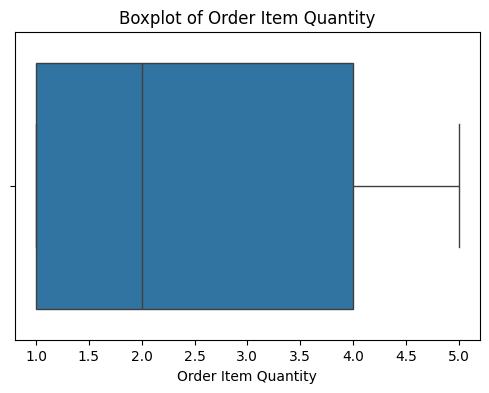

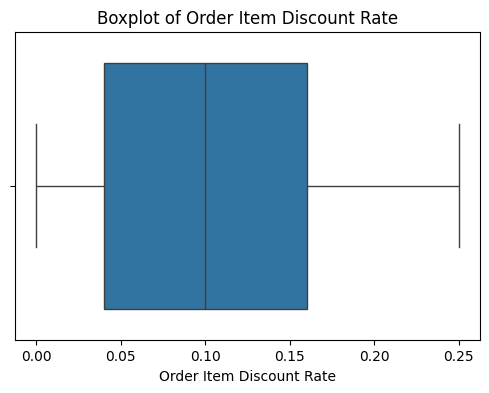

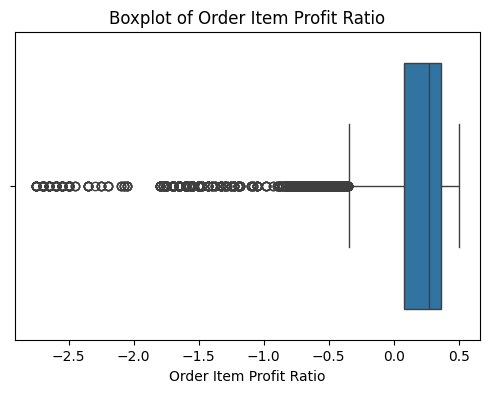

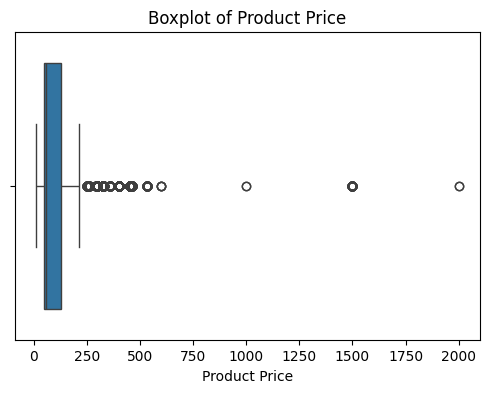

In [39]:
for col in numeric_col:
  plt.figure(figsize = (6,4))
  sns.boxplot(x = new_data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.show()

IN THE ORDER ITEM PROFIT RATIO MAJORILY VALUES ARE CLUSTERED AROUND ZEROS OR NEGATIVE VALUES,INDICATING THAT A SIGNIFICANT PORTION OF ORDERS MAY BE GENERATING LOW OR NEGATIVE PROFIT.
IN PRODUCT PRICE VALUES ARE CONCENTRATED AT THE LOWER END WITH THE MEDIAN BELOW THE UPPER QUANTILE.
THERE ARE SEVERAL HIGH VALUE OUTLIERS

CAT --> NUMERIC

In [40]:
categorical_col = [
    'Shipping Mode',
    'Order Status',
    'Order Region',
    'Delivery Status',
    'Order State',
    'Category Name',
]

In [43]:
for i in categorical_col:
  print(i,data[i].nunique())

Shipping Mode 4
Order Status 9
Order Region 23
Delivery Status 4
Order State 937
Category Name 41


ORDER STATE HAS A HIGH CARDINALITY SO IT WILL IMPOSE HIGH DIMENTIONLITY

In [44]:
pd.crosstab(new_data['Late_delivery_risk'],new_data['Order Status'])

Order Status,CANCELED,CLOSED,COMPLETE,ON_HOLD,PAYMENT_REVIEW,PENDING,PENDING_PAYMENT,PROCESSING,SUSPECTED_FRAUD
Late_delivery_risk,,,,,,,,,
0,364,2373,4852,778,35,1015,976,1119,414
1,0,4088,6246,976,133,932,2354,1097,0


THIS IS STRONGLY CORRELATED.IT IS NOT A DIRECT LEAEK OF THE TARGET

In [45]:
pd.crosstab(new_data['Late_delivery_risk'],new_data['Delivery Status'])

Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Late_delivery_risk,,,,
0,6576,0,778,4572
1,0,15826,0,0


The delivery status can imply a high bias on the target variable

In [46]:
categorical_col = [
    'Shipping Mode',
    'Order Status',
    'Order Region',
    'Category Name',
]

In [47]:
new_data_encoded = pd.get_dummies(new_data,columns = categorical_col,drop_first = True)


In [48]:
new_data_encoded.tail()

,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,shipping date (DateOrders),Late_delivery_risk,...,Category Name_Pet Supplies,Category Name_Shop By Sport,Category Name_Soccer,Category Name_Sporting Goods,Category Name_Strength Training,Category Name_Tennis & Racquet,Category Name_Trade-In,Category Name_Video Games,Category Name_Women's Apparel,Category Name_Women's Clothing
27747,6,4,Late delivery,Puebla,5,0.00,0.01,50.000000,04-05-2015 01:58,1,...,False,False,False,False,False,False,False,False,True,False
27748,6,4,Late delivery,Granada,5,0.01,0.42,39.990002,02-05-2017 10:50,1,...,False,True,False,False,False,False,False,False,False,False
27749,3,4,Advance shipping,Zacatecas,5,0.01,0.16,39.990002,4/22/2017 21:25,0,...,False,True,False,False,False,False,False,False,False,False
27750,5,4,Late delivery,Carabobo,5,0.01,0.48,50.000000,02-04-2017 15:45,1,...,False,False,False,False,False,False,False,False,True,False
27751,3,4,Advance shipping,Norte de Santander,5,0.01,0.33,50.000000,04-01-2015 19:40,0,...,False,False,False,False,False,False,False,False,True,False


In [49]:
new_data_encoded.describe()

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Late_delivery_risk,ProductPrice_log,Order_Item_quantity_log
count,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000,27752.000000
mean,3.461516,2.941049,2.451175,0.102386,0.122768,121.253159,0.570265,4.441885,1.138206
std,1.577116,1.372755,1.557284,0.070779,0.464367,136.527571,0.495047,0.796014,0.445792
min,0.000000,0.000000,1.000000,0.000000,-2.750000,11.290000,0.000000,2.508786,0.693147
25%,2.000000,2.000000,1.000000,0.040000,0.080000,50.000000,0.000000,3.931826,0.693147
50%,3.000000,4.000000,2.000000,0.100000,0.270000,59.990002,1.000000,4.110710,1.098612
75%,5.000000,4.000000,4.000000,0.160000,0.360000,129.990005,1.000000,4.875121,1.609438
max,6.000000,4.000000,5.000000,0.250000,0.500000,1999.989990,1.000000,7.601397,1.791759


In [50]:
new_data_encoded.shape

(27752, 85)

In [51]:
unique_region_count = new_data['Order Region'].nunique()
print(unique_region_count)

23


In [52]:
region_counts = new_data['Order Region'].value_counts()

In [53]:
region_counts

,count
Order Region,
Western Europe,4256
Central America,4108
South America,2155
Oceania,1721
Southeast Asia,1629
Northern Europe,1509
Southern Europe,1494
South Asia,1321
Eastern Asia,1228


In [55]:
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'], errors='coerce')


In [56]:
data.head()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk,ProductPrice_log,Order_Item_quantity_log
1,5,4,Standard Class,PENDING,Late delivery,Rajastán,1,0.05,-0.80,327.75,Sporting Goods,2018-01-18 12:27:00,1,5.795298,0.693147
2,4,4,Standard Class,CLOSED,Shipping on time,Rajastán,1,0.06,-0.80,327.75,Sporting Goods,2018-01-17 12:06:00,0,5.795298,0.693147
13,2,1,First Class,COMPLETE,Late delivery,Maharashtra,1,0.25,0.10,327.75,Sporting Goods,2018-01-15 08:15:00,1,5.795298,0.693147
14,2,1,First Class,PROCESSING,Late delivery,Maharashtra,1,0.00,0.05,327.75,Sporting Goods,2018-01-15 07:54:00,1,5.795298,0.693147
15,2,1,First Class,COMPLETE,Late delivery,Maharashtra,1,0.01,-0.80,327.75,Sporting Goods,2018-01-15 07:33:00,1,5.795298,0.693147


In [57]:
categorical_col = [
    'Shipping Mode',
    'Order Status',
    'Order State',
    'Category Name',
]

In [58]:
data_encoded = pd.get_dummies(data,columns = categorical_col,drop_first = True)
data_encoded.head()

,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,shipping date (DateOrders),Late_delivery_risk,ProductPrice_log,...,Category Name_Men's Footwear,Category Name_Music,Category Name_Pet Supplies,Category Name_Shop By Sport,Category Name_Sporting Goods,Category Name_Tennis & Racquet,Category Name_Trade-In,Category Name_Video Games,Category Name_Women's Apparel,Category Name_Women's Clothing
1,5,4,Late delivery,1,0.05,-0.80,327.75,2018-01-18 12:27:00,1,5.795298,...,False,False,False,False,True,False,False,False,False,False
2,4,4,Shipping on time,1,0.06,-0.80,327.75,2018-01-17 12:06:00,0,5.795298,...,False,False,False,False,True,False,False,False,False,False
13,2,1,Late delivery,1,0.25,0.10,327.75,2018-01-15 08:15:00,1,5.795298,...,False,False,False,False,True,False,False,False,False,False
14,2,1,Late delivery,1,0.00,0.05,327.75,2018-01-15 07:54:00,1,5.795298,...,False,False,False,False,True,False,False,False,False,False
15,2,1,Late delivery,1,0.01,-0.80,327.75,2018-01-15 07:33:00,1,5.795298,...,False,False,False,False,True,False,False,False,False,False


1181 columns --> 128 columns

In [59]:
data_encoded['ship_weekday'] = data_encoded['shipping date (DateOrders)'].dt.weekday
data_encoded['ship_month']   = data_encoded['shipping date (DateOrders)'].dt.month


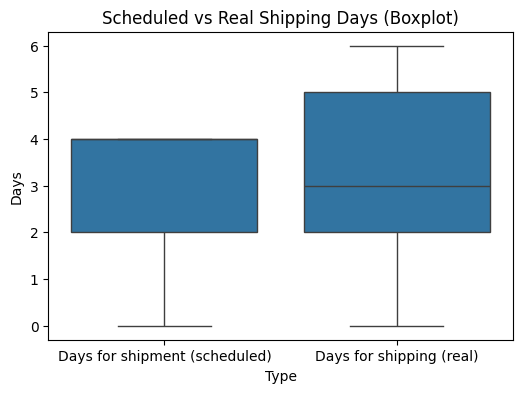

In [60]:
data_box = data_encoded[['Days for shipment (scheduled)', 'Days for shipping (real)']]
data_box_melted = data_box.melt(var_name='Type', value_name='Days')

plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Days', data=data_box_melted)
plt.title('Scheduled vs Real Shipping Days (Boxplot)')
plt.xlabel('Type')
plt.ylabel('Days')
plt.show()

DUE TO THE MEDIAN WHICH IS HIGH FOR THE SHIPPING IT MAY INDICATE THAT THE ACTUAL SHIPPING TENDS TO BE LONGER THAN SCHEDULED TIMES FOR MANY ORDERS CAUSING DELAY BEFORE SHIPMENT


In [61]:
month_delay = data_encoded.groupby('ship_month')['Late_delivery_risk'].mean()

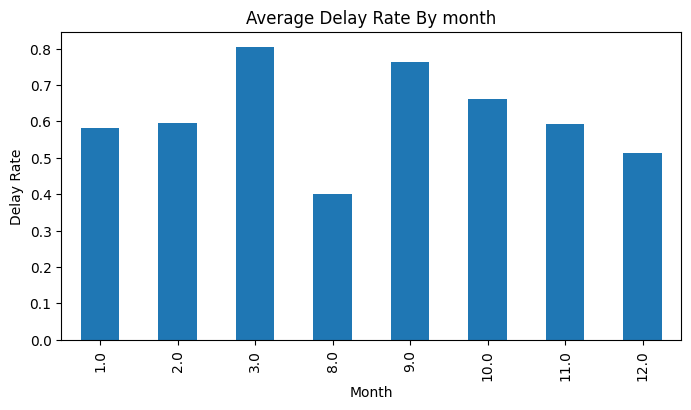

In [62]:
plt.figure(figsize = (8,4))
month_delay.plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Delay Rate")
plt.title("Average Delay Rate By month")
plt.show()

 DELAYS RATES ARE HIGH IN MARCH,AUGUST AND ALSO REST OF ALL TOO HAVE SOME HIGH DELAYS THOUGH

In [63]:
print(data_encoded['ship_month'].value_counts().sort_index())

ship_month
1.0     215
2.0     124
3.0      36
8.0       5
9.0      21
10.0     59
11.0    165
12.0    162
Name: count, dtype: int64


THERE ARE NO ORDERS IN THE 4,5,6 MONTHS
DOES IT TELL SOMETHING?

OR DUE TO THE FILTERING STEP MIGHT HAVE DELETED THE MONTHS

In [64]:
week_delay = data_encoded.groupby('ship_weekday')['Late_delivery_risk'].mean()

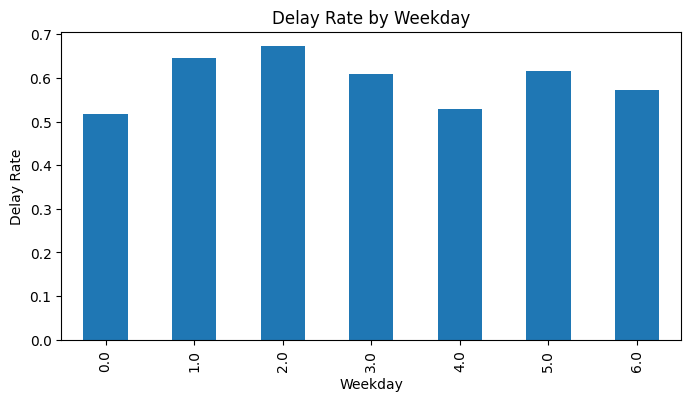

In [65]:
plt.figure(figsize=(8, 4))
week_delay.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Weekday')
plt.show()

EACH BAR SHOWS THE AVG PROPORTION OF SHIPMENTS MARKED AS LATE FOR THAT SPECIFIC WEEKDAY
AND ALL OF THE DAYs ARE MOSTLY MARKED AS LATE

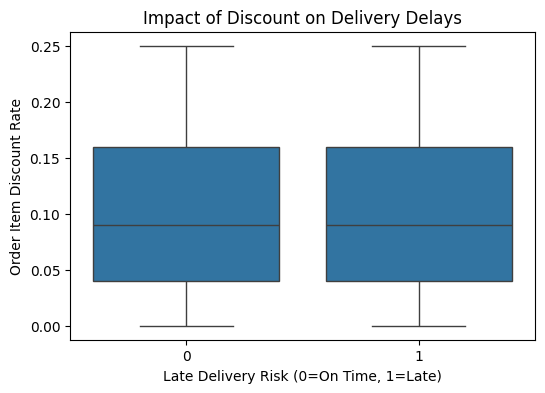

In [66]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Late_delivery_risk', y='Order Item Discount Rate', data=data_encoded)
plt.xlabel('Late Delivery Risk (0=On Time, 1=Late)')
plt.ylabel('Order Item Discount Rate')
plt.title('Impact of Discount on Delivery Delays')
plt.show()


There is no major or visible diffrence beweeen the discount rates of late and ontime orders
It might be becasue of the moderate imbalance of the data in late_delivery_risk

In [67]:
data_encoded['Discount Group'] = pd.cut(data_encoded['Order Item Discount Rate'],bins = 5)
discount_delay_rate = data_encoded.groupby('Discount Group')['Late_delivery_risk'].mean()

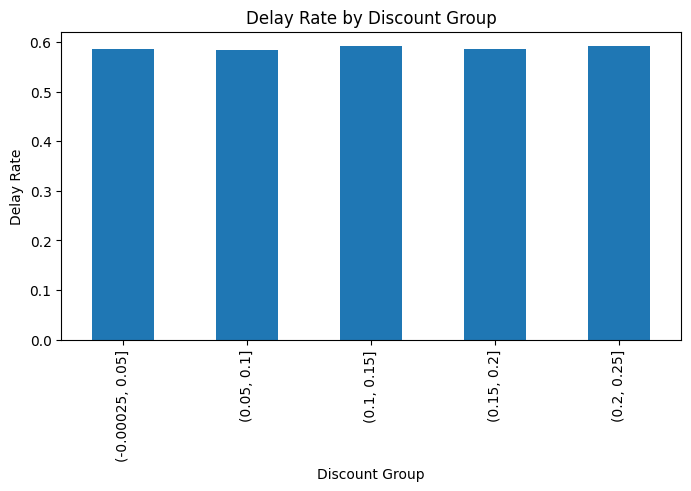

In [68]:
plt.figure(figsize = (8,4))
discount_delay_rate.plot(kind = 'bar')
plt.xlabel('Discount Group')
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Discount Group')
plt.show()

In [69]:
data_encoded

,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,shipping date (DateOrders),Late_delivery_risk,ProductPrice_log,...,Category Name_Shop By Sport,Category Name_Sporting Goods,Category Name_Tennis & Racquet,Category Name_Trade-In,Category Name_Video Games,Category Name_Women's Apparel,Category Name_Women's Clothing,ship_weekday,ship_month,Discount Group
1,5,4,Late delivery,1,0.05,-0.80,327.750000,2018-01-18 12:27:00,1,5.795298,...,False,True,False,False,False,False,False,3.0,1.0,"(0.05, 0.1]"
2,4,4,Shipping on time,1,0.06,-0.80,327.750000,2018-01-17 12:06:00,0,5.795298,...,False,True,False,False,False,False,False,2.0,1.0,"(0.05, 0.1]"
13,2,1,Late delivery,1,0.25,0.10,327.750000,2018-01-15 08:15:00,1,5.795298,...,False,True,False,False,False,False,False,0.0,1.0,"(0.2, 0.25]"
14,2,1,Late delivery,1,0.00,0.05,327.750000,2018-01-15 07:54:00,1,5.795298,...,False,True,False,False,False,False,False,0.0,1.0,"(-0.00025, 0.05]"
15,2,1,Late delivery,1,0.01,-0.80,327.750000,2018-01-15 07:33:00,1,5.795298,...,False,True,False,False,False,False,False,0.0,1.0,"(-0.00025, 0.05]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27301,6,4,Late delivery,4,0.00,0.06,24.990000,2016-01-18 12:47:00,1,3.257712,...,False,False,False,False,False,False,False,0.0,1.0,"(-0.00025, 0.05]"
27302,5,4,Late delivery,4,0.02,-2.50,17.990000,2016-10-18 09:25:00,1,2.943913,...,False,False,False,False,False,False,False,1.0,10.0,"(-0.00025, 0.05]"
27308,4,4,Shipping on time,4,0.20,0.44,24.990000,2015-12-24 07:02:00,0,3.257712,...,False,False,False,False,False,False,False,3.0,12.0,"(0.2, 0.25]"
27312,2,4,Advance shipping,4,0.07,0.33,99.989998,2015-11-30 03:33:00,0,4.615021,...,False,False,False,False,False,False,False,0.0,11.0,"(0.05, 0.1]"


WHAT I THINK IS THAT THE HIGHEST POSITIVE AND NEGATIVE ARE THE MOST IMPORTANT PREDICTOR FOR LATE DELIVERY RISK

FIRST LETS TRAIN WITH THESE FEATURES

In [75]:
try_features = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Shipping Mode_Second Class',
    'Order Status_COMPLETE',
    'Shipping Mode_Standard Class',
]

In [76]:
X = data_encoded[try_features]
y = data_encoded['Late_delivery_risk']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)


In [78]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter = 500)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [79]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_lr = model_lr.predict(X_test)
print("0Accuracy:",accuracy_score(y_test,y_test))
print("Classification report:",classification_report(y_test,y_pred_lr))

0Accuracy: 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98       110
           1       0.97      1.00      0.99       155

    accuracy                           0.98       265
   macro avg       0.99      0.98      0.98       265
weighted avg       0.99      0.98      0.98       265



In [80]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)


RandomForestClassifier()

In [81]:
y_pred_rf = model_rf.predict(X_test)
print("0Accuracy:",accuracy_score(y_test,y_test))
print("Classification report:",classification_report(y_test,y_pred_rf))

0Accuracy: 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98       110
           1       0.97      1.00      0.99       155

    accuracy                           0.98       265
   macro avg       0.99      0.98      0.98       265
weighted avg       0.99      0.98      0.98       265



In [83]:
feature_imp = pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp

,0
Days for shipping (real),0.607934
Shipping Mode_Standard Class,0.196948
Days for shipment (scheduled),0.176265
Shipping Mode_Second Class,0.015942
Order Status_COMPLETE,0.002911
